In [8]:
#Importing libararies
%matplotlib inline
import os
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report, roc_curve, auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Change the directory name
os.chdir('C:/Users/ssahi/Documents/ML_Course/Assignment_1')

In [10]:
#Reading the data
df = pd.read_csv("sgemm_product.csv")
df.shape

(241600, 18)

In [50]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [51]:
#Checking for missing values
df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [11]:
#Taking the average of runs for target variable
df["avg_run"] = df.iloc[:,14:].mean(axis = 1)

#Taking log of the Average run times
df["log_avg_run"] = np.log(df.avg_run) 

#Dropping the four Run columns
df.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], axis = 1, inplace = True)

df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_run,log_avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,4.756775
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,4.365707
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,4.389064
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,4.461733
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,4.776283


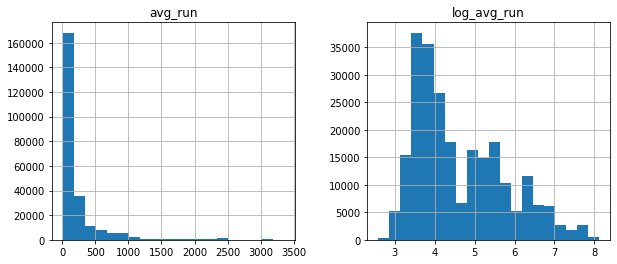

In [53]:
plt.rcParams['figure.figsize'] = (10, 4)
run_time_cols = ["avg_run","log_avg_run"]
run_times=df[run_time_cols]
run_times.hist(bins = 20) ;

In [12]:
#Dropping the Average run column
df.drop(['avg_run'], axis = 1, inplace = True)

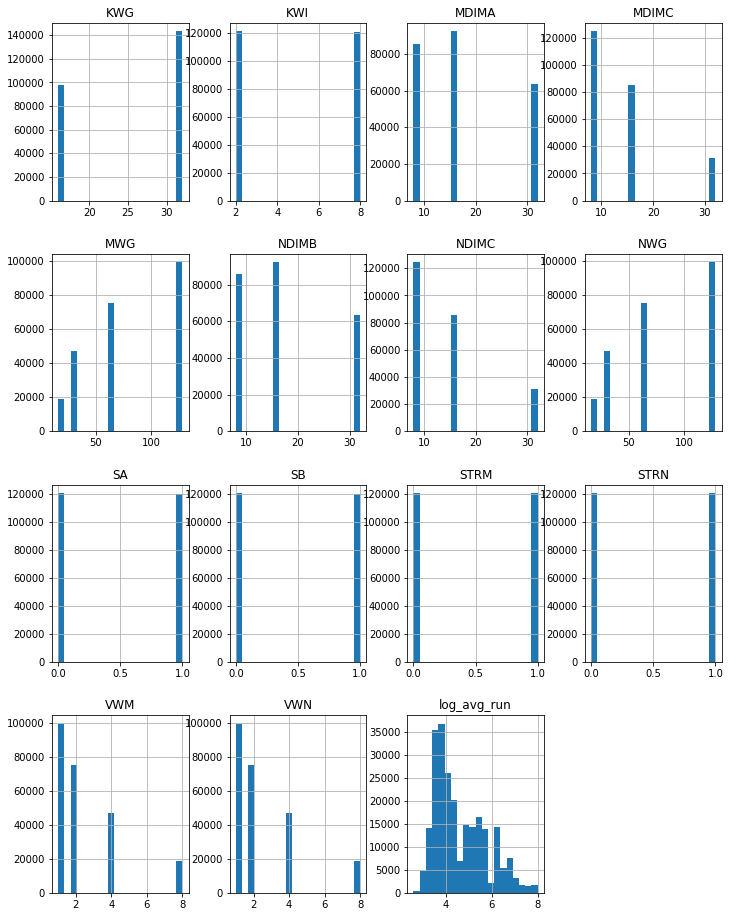

In [17]:
# Histogram of all the features to understand the distribution
df.hist(bins = 20 , figsize= (12,16)) ;

In [9]:
# Finding the threshold value for doing the classification
print(df.log_avg_run.describe())
print(df.log_avg_run.median())

count    241600.000000
mean          4.623068
std           1.128530
min           2.589079
25%           3.705429
50%           4.245491
75%           5.431044
max           8.114177
Name: log_avg_run, dtype: float64
4.245490733029061


In [13]:
#Creating target classes
#threshold = median = 4.245490733029061

thresh = df.log_avg_run.median()
df["Tgt_Class"] = df.log_avg_run.apply(lambda x : 0 if x <= thresh else 1)
df.drop(['log_avg_run'], axis = 1, inplace = True)

df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Tgt_Class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1


In [14]:
#Divide the data into independent features X and Clasification lables Y
X = df.drop('Tgt_Class', axis=1)
y = df['Tgt_Class']

scaler = StandardScaler().fit(X)
X_sc = scaler.transform(X)
X_sc = pd.DataFrame(X_sc)

In [15]:
#Splitting into train-test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#Scaling the independent features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear SVM

In [10]:
LinearSVM_model = SVC(kernel='linear', C = 0.001)
LinearSVM_model.fit(X_train, y_train)
y_pred_LinearSVM = LinearSVM_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_LinearSVM)
print(accuracy)

0.830698123620309


In [11]:
LinearSVM_model = SVC(kernel='linear', C = 0.01)
LinearSVM_model.fit(X_train, y_train)
y_pred_LinearSVM = LinearSVM_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_LinearSVM)
print(accuracy)

0.8306153421633554


In [12]:
LinearSVM_model = SVC(kernel='linear', C = 0.1)
LinearSVM_model.fit(X_train, y_train)
y_pred_LinearSVM = LinearSVM_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_LinearSVM)
print(accuracy)

0.8306843267108168


In [13]:
LinearSVM_model = SVC(kernel='linear', C = 1)
LinearSVM_model.fit(X_train, y_train)
y_pred_LinearSVM = LinearSVM_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_LinearSVM)
print(accuracy)

0.8307119205298014


In [9]:
LinearSVM_model = SVC(kernel='linear', C = 5)
LinearSVM_model.fit(X_train, y_train)
y_pred_LinearSVM = LinearSVM_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_LinearSVM)
print(accuracy)

0.8307257174392936


In [10]:
print("\nConfusion Matrix for Test data:")
print(confusion_matrix(y_test,y_pred_LinearSVM))
print("\nClassification Report for Test data:")
print(classification_report(y_test,y_pred_LinearSVM))


Confusion Matrix for Test data:
[[31317  5114]
 [ 7155 28894]]

Classification Report for Test data:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84     36431
           1       0.85      0.80      0.82     36049

    accuracy                           0.83     72480
   macro avg       0.83      0.83      0.83     72480
weighted avg       0.83      0.83      0.83     72480



In [9]:
acc_LinearSVM = [0.830698123620309, 0.8306153421633554, 0.8306843267108168, 0.8307119205298014, 0.8307257174392936]
C = [0.001,0.01,0.1,1,5]

Max Accuracy: 0.8307257174392936 at C: 5


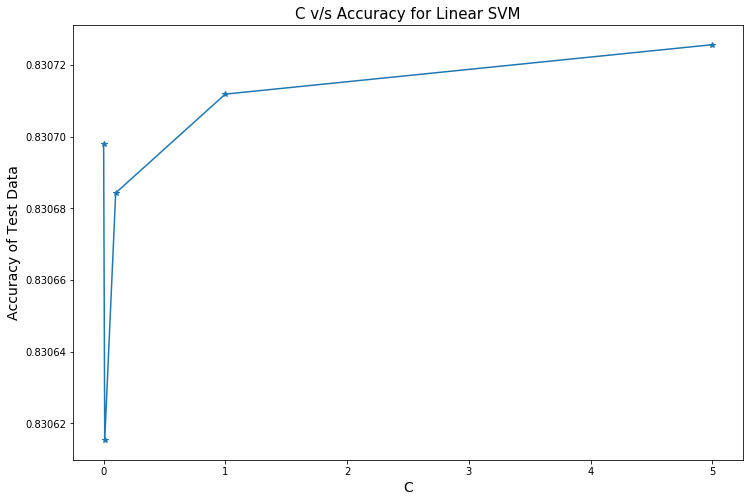

In [12]:
print("Max Accuracy:", max(acc_LinearSVM), "at C:", C[acc_LinearSVM.index(max(acc_LinearSVM))])

plt.plot(C, acc_LinearSVM, marker='*')
plt.xlabel('C', fontsize=14)
plt.ylabel('Accuracy of Test Data', fontsize=14)
plt.title('C v/s Accuracy for Linear SVM', fontsize=15)
plt.show()

## Rbf SVM

In [ ]:
## Results from the code run in the another .ipynb file

## C = 1, gamma = 0.01
## Test accuracy: 0.9195364238410596
## Train accuracy: 0.9175851466414381

## C = 1, gamma = 0.1
## Test accuracy: 0.9640728476821192
## Train accuracy: 0.9670529801324503

## C = 1, gamma = 1
## Test accuracy: 0.9279111479028698
## Train accuracy: 0.9751892147587512

In [13]:
## C = 1, gamma = 10
RbfSVM_model = SVC(kernel='rbf', C = 1, gamma = 10)
RbfSVM_model.fit(X_train, y_train)

y_pred_RbfSVM_test = RbfSVM_model.predict(X_test)
accuracy_test = accuracy_score(y_test,y_pred_RbfSVM_test)
print("Test accuracy:",accuracy_test)

y_pred_RbfSVM_train = RbfSVM_model.predict(X_train)
accuracy_train = accuracy_score(y_train,y_pred_RbfSVM_train)
print("Train accuracy:",accuracy_train)

print("\nConfusion Matrix for Test data:")
print(confusion_matrix(y_test,y_pred_RbfSVM_test))
print("\nClassification Report for Test data:")
print(classification_report(y_test,y_pred_RbfSVM_test))

Test accuracy: 0.8025800220750552
Train accuracy: 1.0

Confusion Matrix for Test data:
[[25087 11344]
 [ 2965 33084]]

Classification Report for Test data:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78     36431
           1       0.74      0.92      0.82     36049

    accuracy                           0.80     72480
   macro avg       0.82      0.80      0.80     72480
weighted avg       0.82      0.80      0.80     72480



In [14]:
acc_RbfSVM_Test = [0.9195364238410596, 0.9640728476821192, 0.9279111479028698, 0.8025800220750552]
acc_RbfSVM_Train = [0.9175851466414381, 0.9670529801324503, 0.9751892147587512, 1.0]
gamma = [0.01,0.1,1,10]

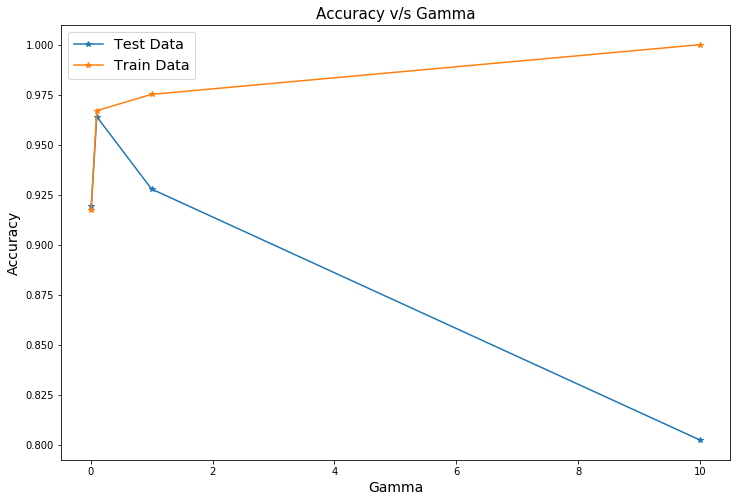

In [15]:
plt.plot(gamma, acc_RbfSVM_Test, marker='*', label="Test Data")
plt.plot(gamma, acc_RbfSVM_Train, marker='*', label="Train Data")
plt.legend(fontsize='x-large')
plt.xlabel('Gamma', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy v/s Gamma', fontsize=15)
plt.show()

## Poly SVM

In [ ]:
## Results from the code run in the another .ipynb file

## C = 1, degree = 2
## Test accuracy: 0.7440673289183223
## Train accuracy: 0.744654683065279

## C = 1, degree = 6
## Test accuracy: 0.9382864238410596
## Train accuracy: 0.9435903500473037

In [18]:
PolySVM_model = SVC(kernel='poly', C = 1, degree = 4)
PolySVM_model.fit(X_train, y_train)

In [17]:
## C = 1, degree = 4
y_pred_PolySVM_test = PolySVM_model.predict(X_test)
accuracy_test = accuracy_score(y_test,y_pred_PolySVM_test)
print("Test accuracy:",accuracy_test)

y_pred_PolySVM_train = PolySVM_model.predict(X_train)
accuracy_train = accuracy_score(y_train,y_pred_PolySVM_train)
print("Train accuracy:",accuracy_train)

print("\nConfusion Matrix for Test data:")
print(confusion_matrix(y_test,y_pred_PolySVM_test))
print("\nClassification Report for Test data:")
print(classification_report(y_test,y_pred_PolySVM_test))

Test accuracy: 0.9420391832229581
Train accuracy: 0.9430286187322611

Confusion Matrix for Test data:
[[35129  1302]
 [ 2899 33150]]

Classification Report for Test data:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     36431
           1       0.96      0.92      0.94     36049

    accuracy                           0.94     72480
   macro avg       0.94      0.94      0.94     72480
weighted avg       0.94      0.94      0.94     72480



In [19]:
acc_PolySVM_Test = [0.7440673289183223, 0.9420391832229581, 0.9382864238410596]
acc_PolySVM_Train = [0.744654683065279, 0.9430286187322611, 0.9435903500473037]
degree = [2,4,6]

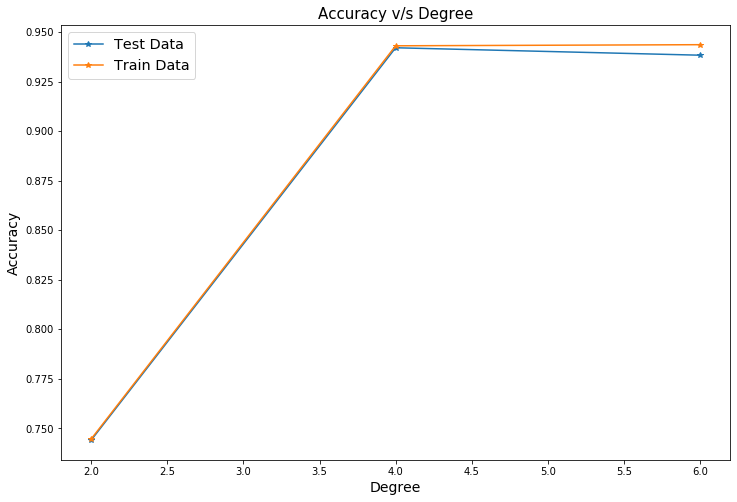

In [20]:
plt.plot(degree, acc_PolySVM_Test, marker='*', label="Test Data")
plt.plot(degree, acc_PolySVM_Train, marker='*', label="Train Data")
plt.legend(fontsize='x-large')
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy v/s Degree', fontsize=15)
plt.show()

## Decision Tree

In [59]:
DecTree_model = DecisionTreeClassifier(random_state=0)

In [60]:
DecTree_model = DecTree_model.fit(X_train, y_train)
y_pred_DecTree = DecTree_model.predict(X_test)

In [61]:
print("Accuracy:", accuracy_score(y_test,y_pred_DecTree))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_DecTree))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_DecTree))

Accuracy: 0.9910182119205299

Confusion Matrix:
[[36103   328]
 [  323 35726]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     36431
           1       0.99      0.99      0.99     36049

    accuracy                           0.99     72480
   macro avg       0.99      0.99      0.99     72480
weighted avg       0.99      0.99      0.99     72480



In [62]:
DecTree_model.get_depth()

22

#### How the max depth of decision tree affects the accuracy

In [63]:
acc_DT_train = []
acc_DT_test = []
depth = range(1,22)

for i in depth:
    DecTree_model = DecisionTreeClassifier(random_state=0, max_depth = i)
    DecTree_model = DecTree_model.fit(X_train, y_train)
    y_pred_DecTree_test = DecTree_model.predict(X_test)
    y_pred_DecTree_train = DecTree_model.predict(X_train)
    accuracy_test = accuracy_score(y_test,y_pred_DecTree_test)
    accuracy_train = accuracy_score(y_train,y_pred_DecTree_train)
    acc_DT_test.append(accuracy_test)
    acc_DT_train.append(accuracy_train)

Max Accuracy for Test Data Set: 0.99100 for depth: 21
Max Accuracy for Train Data Set: 0.99998 for depth: 21


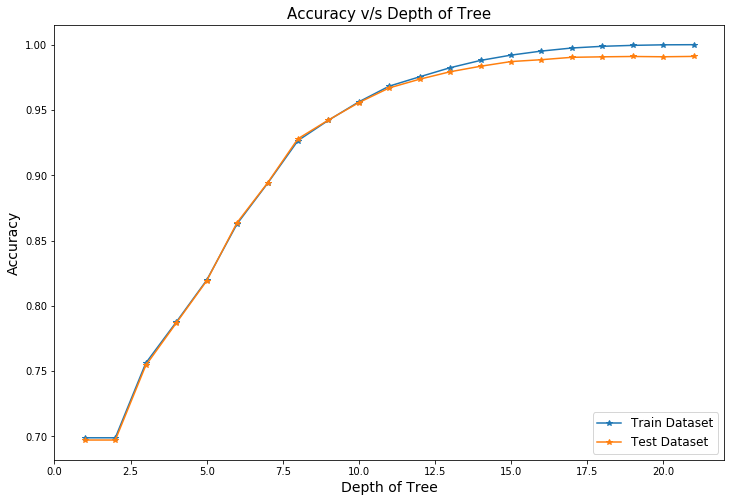

In [66]:
print("Max Accuracy for Test Data Set:", "{:.5f}".format(max(acc_DT_test))
      , "for depth:", depth[acc_DT_test.index(max(acc_DT_test))])
print("Max Accuracy for Train Data Set:", "{:.5f}".format(max(acc_DT_train))
      , "for depth:", depth[acc_DT_train.index(max(acc_DT_train))])

plt.plot(depth,acc_DT_train,marker='*',label='Train Dataset')
plt.plot(depth,acc_DT_test,marker='*',label='Test Dataset')
plt.legend(loc='lower right', fontsize='large')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Depth of Tree',fontsize=14)
plt.title('Accuracy v/s Depth of Tree',fontsize=15)
plt.show()

#### Pruning

In [67]:
Df_prune_model = DecisionTreeClassifier(random_state=0)
path = Df_prune_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs Effective Alpha for Training Dataset')

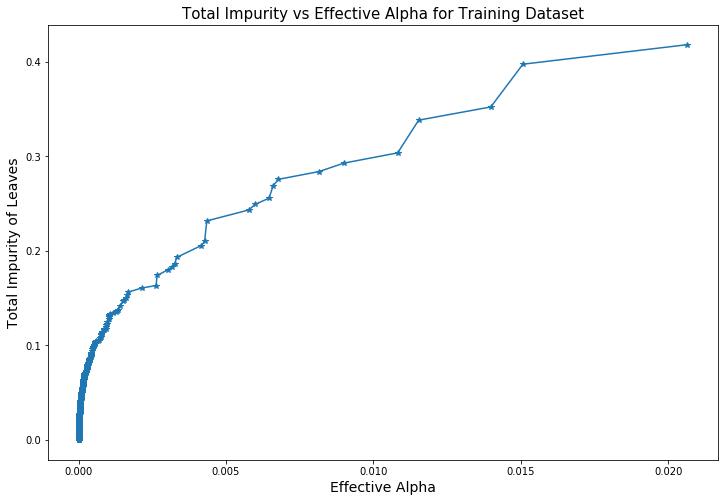

In [68]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='*')
ax.set_xlabel("Effective Alpha", fontsize = 14)
ax.set_ylabel("Total Impurity of Leaves", fontsize = 14)
ax.set_title("Total Impurity vs Effective Alpha for Training Dataset", fontsize = 15)

In [37]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
    
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

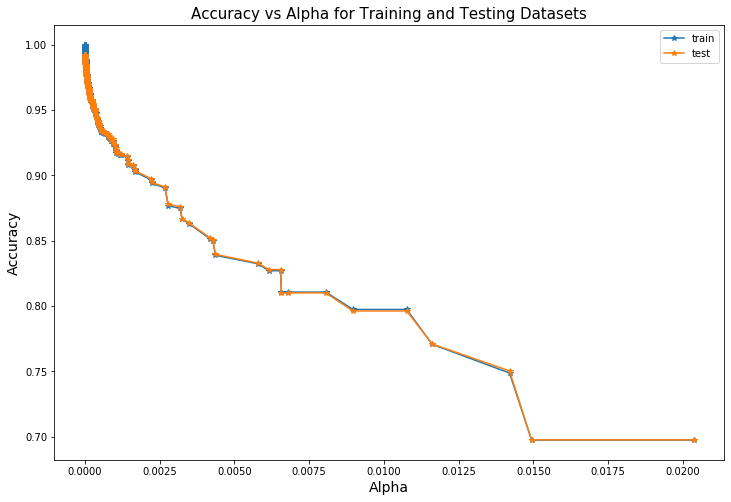

In [38]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha", fontsize = 14)
ax.set_ylabel("Accuracy", fontsize = 14)
ax.set_title("Accuracy vs Alpha for Training and Testing Datasets", fontsize = 15)
ax.plot(ccp_alphas, train_scores, marker='*', label="train")
ax.plot(ccp_alphas, test_scores, marker='*', label="test")
ax.legend()
plt.show()

## Bagging (Random Forest)

#### How Number of estimators and Max Depth of trees affect the accuracy

In [69]:
acc_rfc = []
n_estimators = [50,100,200,300,400,500]
max_depth = [5,10,15,20,22]

for j in max_depth:
    acc_d = []
    for i in n_estimators:
        rfc = RandomForestClassifier(n_estimators = i, random_state = 0, max_depth = j)
        rfc = rfc.fit(X_train, y_train)
        y_pred_rfc = rfc.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred_rfc)
        acc_d.append(accuracy)
    acc_rfc.append(acc_d)

Max Accuracy for Depth 5 : 0.83281 at estimators: 300
Max Accuracy for Depth 10 : 0.94661 at estimators: 300
Max Accuracy for Depth 15 : 0.98237 at estimators: 400
Max Accuracy for Depth 20 : 0.98773 at estimators: 500
Max Accuracy for Depth 22 : 0.98818 at estimators: 500




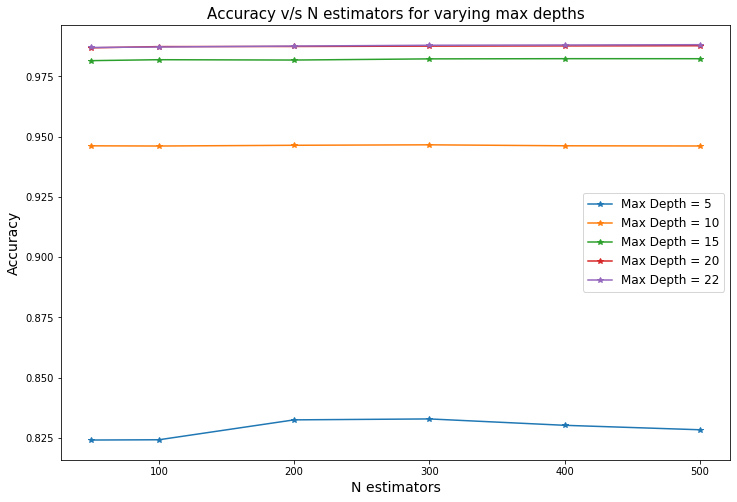

In [71]:
for i in range(0,5):
    print("Max Accuracy for Depth", max_depth[i] ,":", "{:.5f}".format(max(acc_rfc[i]))
          , "at estimators:", n_estimators[acc_rfc[i].index(max(acc_rfc[i]))])
print("\n")

for i in range(0,len(max_depth)):
    plt.plot(n_estimators, acc_rfc[i], marker='*', label="Max Depth = {}".format(max_depth[i]))
plt.legend(loc='best', fontsize='large')
plt.title('Accuracy v/s N estimators for varying max depths',fontsize=15)
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('N estimators',fontsize=14)
plt.show()

#### Calculating the error metrics for best Random Forest Model

In [72]:
rfc_best = RandomForestClassifier(n_estimators = 500, random_state = 0, max_depth = 20)
rfc_best = rfc_best.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [73]:
print("Accuracy:", accuracy_score(y_test,y_pred_rfc))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_rfc))
print("\nClassification Report:")
print(classification_report(y_test,y_pred_rfc))

Accuracy: 0.9881760485651214

Confusion Matrix:
[[36190   241]
 [  616 35433]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     36431
           1       0.99      0.98      0.99     36049

    accuracy                           0.99     72480
   macro avg       0.99      0.99      0.99     72480
weighted avg       0.99      0.99      0.99     72480



## Boosting

In [74]:
acc=[]
n_estimators = [100,200,300,400,500]
max_depth = [5,10,15,20,22]

for j in max_depth:
    acc_d = []
    for i in n_estimators:
        clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = j, random_state = 0)
                         , n_estimators = i, learning_rate = 1, random_state = 0)
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        acc_d.append(accuracy)
    acc.append(acc_d)

Max Accuracy for Depth 5 : 0.99247 at estimators: 500
Max Accuracy for Depth 10 : 0.99197 at estimators: 500
Max Accuracy for Depth 15 : 0.99216 at estimators: 300
Max Accuracy for Depth 20 : 0.99216 at estimators: 500
Max Accuracy for Depth 22 : 0.99092 at estimators: 100




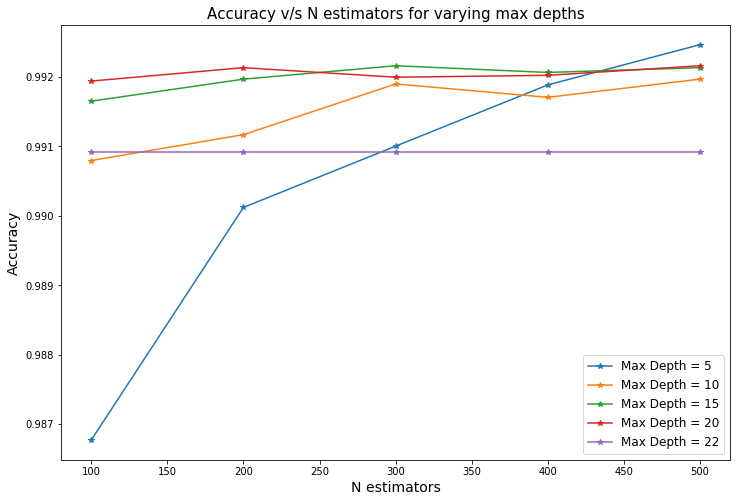

In [76]:
for i in range(0,5):
    print("Max Accuracy for Depth", max_depth[i] ,":", "{:.5f}".format(max(acc[i]))
          , "at estimators:", n_estimators[acc[i].index(max(acc[i]))])
print("\n")

for i in range(0,len(max_depth)):
    plt.plot(n_estimators, acc[i], marker='*', label="Max Depth = {}".format(max_depth[i]))
plt.legend(loc='lower right', fontsize='large')
plt.title('Accuracy v/s N estimators for varying max depths',fontsize=15)
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('N estimators',fontsize=14)
plt.show()

In [78]:
#best
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 22, random_state = 0)
                         , n_estimators = 100, learning_rate = 1, random_state = 0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
accuracy

0.9909216335540839

## Cross Validation Scores on all the best models

In [33]:
LinearSVM_model_bst = SVC(kernel='linear', C = 1)
cv_LinearSVM = cross_validate(LinearSVM_model_bst, X_sc, y, cv=5)

In [34]:
cv_LinearSVM['test_score']

array([0.52044702, 0.43803808, 0.74604719, 0.60368377, 0.46864652])

In [35]:
RbfSVM_model_bst = SVC(kernel='rbf', C = 1, gamma = 0.1)
cv_RbfSVM = cross_validate(RbfSVM_model_bst, X_sc, y, cv=5)

In [36]:
cv_RbfSVM['test_score']

array([0.67539321, 0.88907285, 0.75618791, 0.90064156, 0.61889487])

In [39]:
PolySVM_model_bst = SVC(kernel='poly', C = 1, degree = 4)
cv_ploySVM = cross_validate(PolySVM_model_bst, X_sc, y, cv=5)

In [40]:
cv_ploySVM['test_score']

array([0.56866722, 0.58143626, 0.5151697 , 0.60217301, 0.51912252])

In [26]:
DecTree_model_bst = DecisionTreeClassifier(random_state=0)
cv_DecTree = cross_validate(DecTree_model_bst, X_sc, y, cv=5)

In [29]:
cv_DecTree['test_score']

array([0.57477235, 0.31848096, 0.56475579, 0.70022765, 0.50273179])

In [31]:
rfc_bst = RandomForestClassifier(n_estimators = 500, random_state = 0, max_depth = 20)
cv_Rf = cross_validate(rfc_bst, X_sc, y, cv=5)

In [32]:
cv_Rf['test_score']

array([0.53907285, 0.49828228, 0.50020695, 0.64093543, 0.5013452 ])

In [37]:
boost_bst = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 22, random_state = 0)
                         , n_estimators = 100, learning_rate = 1, random_state = 0)
cv_boost = cross_validate(boost_bst, X_sc, y, cv=5)

In [38]:
cv_boost['test_score']

array([0.57477235, 0.34704056, 0.56806705, 0.69581954, 0.50273179])

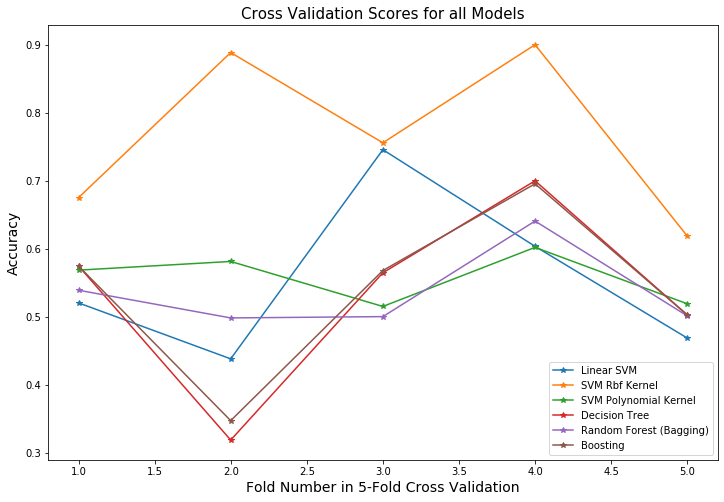

In [41]:
iter=[1,2,3,4,5]

plt.plot(iter, cv_LinearSVM['test_score'], marker = '*', label = 'Linear SVM')
plt.plot(iter, cv_RbfSVM['test_score'], marker = '*', label = 'SVM Rbf Kernel')
plt.plot(iter, cv_ploySVM['test_score'], marker = '*', label = 'SVM Polynomial Kernel')
plt.plot(iter, cv_DecTree['test_score'], marker = '*', label = 'Decision Tree')
plt.plot(iter, cv_Rf['test_score'], marker = '*', label = 'Random Forest (Bagging)')
plt.plot(iter, cv_boost['test_score'], marker = '*', label = 'Boosting')

plt.xlabel('Fold Number in 5-Fold Cross Validation', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.title('Cross Validation Scores for all Models', fontsize = 15)
plt.legend()

plt.show()